In [1]:
# !pip install ultralytics

# Entrenando YOLOv8

Con este set up funciona en mi máquina (**torch y torchvision**): 

- pip install torch==2.2.0+cu118 -f https://download.pytorch.org/whl/torch_stable.html
- pip install torchvision==0.17.0+cu118 -f https://download.pytorch.org/whl/torch_stable.html


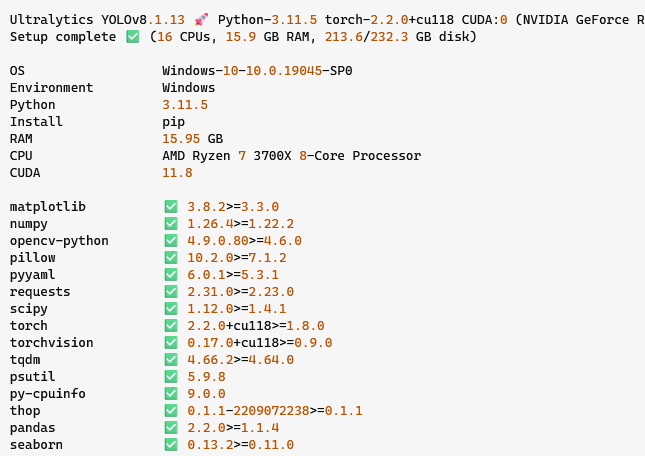

In [2]:
from ultralytics import YOLO
import torch
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import warnings

warnings.filterwarnings('ignore')

c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\TFM_transformer_agents\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\TFM_transformer_agents\venv\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [3]:
# EL MODELO AL PRINCIPIO
model=YOLO("yolov8m.pt")  

#UNA VEZ ENTRENADO A MEDIAS EL MODELO

#half_trained_model = YOLO('C:/Users/plane/OneDrive/Escritorio/COMPUTING SCIENCE/TFM_transformer_agents/runs/detect/train15/weights/last.pt')

In [4]:
# Comprueba si CUDA (GPU support) está disponible
if torch.cuda.is_available():
    print("CUDA (GPU support) está disponible en este sistema.")
    print("Número de dispositivos GPU disponibles:", torch.cuda.device_count())
    print("Nombre del dispositivo GPU actual:", torch.cuda.get_device_name(torch.cuda.current_device()))
else:
    print("CUDA (GPU support) no está disponible en este sistema.")

CUDA (GPU support) está disponible en este sistema.
Número de dispositivos GPU disponibles: 1
Nombre del dispositivo GPU actual: NVIDIA GeForce RTX 2060


## Documentación para el entrenamiento de YOLO

https://docs.ultralytics.com/es/usage/cfg/#train-settings

In [5]:
# Inicia el entrenamiento

yaml_path = 'C:/Users/plane/OneDrive/Escritorio/COMPUTING SCIENCE/TFM_transformer_agents/proyecto_yolo/signature_detection.yaml'
#checkpoints_path = 'C:/Users/plane/OneDrive/Escritorio/COMPUTING SCIENCE/TFM_transformer_agents/runs/detect/train15/weights/last.pt'  # Ajusta esta ruta'
# results = model.train(data=yaml_path,
#                       epochs=100,    # Número de épocas de entrenamiento
#                       batch=8,       # Tamaño del batch
#                       imgsz=640,     # Tamaño de la imagen
#                       device= 0)      # Usa 'cuda' para entrenar en GPU

# # Guarda el modelo entrenado
# model.save('sign_detect_yolo.pt')

# results = half_trained_model.train(data=yaml_path,
#                       epochs=100,    # Número de épocas de entrenamiento
#                       batch=8,       # Tamaño del batch
#                       imgsz=640,     # Tamaño de la imagen
#                       resume= True,
#                       device= 0)      # Usa 'cuda' para entrenar en GPU
# half_trained_model.save('sign_detect_yolo.pt')

## val yolo

In [6]:
# Load a pretrained YOLOv8n model
path_to_best_yolo = "C:/Users/plane/OneDrive/Escritorio/COMPUTING SCIENCE/TFM_transformer_agents/runs\detect/train\weights/best.pt"

model = YOLO(path_to_best_yolo)

# Define path to the image file
validation_results = model.val(data='signature_detection.yaml',
                               imgsz=640,
                               batch=7,
                               conf=0.25,
                               iou=0.6,
                               device='0')

Ultralytics YOLOv8.1.19 🚀 Python-3.9.11 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning C:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\TFM_transformer_agents\proyecto_yolo\labels\val.cache... 433 images, 10 backgrounds, 0 corrupt: 100%|██████████| 443/443 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  5.07it/s]


                   all        443       1310      0.896      0.877      0.903      0.578
             signature        443        773       0.91      0.947      0.949      0.604
              initials        443        161      0.881      0.789       0.86      0.506
             redaction        443        282      0.865      0.957      0.913      0.627
                  date        443         94      0.927      0.815      0.888      0.574
Speed: 0.5ms preprocess, 18.5ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\TFM_transformer_agents\runs\detect\val2


In [7]:
validation_results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000023DE159E820>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

# test YOLO

In [20]:
import pandas as pd
import os

In [22]:
path_to_data = 'C:/Users/plane/OneDrive/Escritorio/COMPUTING SCIENCE/TFM_transformer_agents/data/signature_detection'
test_data_file = 'test_data.pickle'

test_df = pd.read_pickle(os.path.join(path_to_data, test_data_file))
test_df.head()

,image_id,file_name,category_id,yolo_bbox
72,30,gsa_LAK07264-Lease_Z-03.png,1,"[0.426025390625, 0.9334621697397829, 0.0594830..."
73,30,gsa_LAK07264-Lease_Z-03.png,1,"[0.5895389784250827, 0.9406679038952745, 0.083..."
74,31,nist_r0293_01.png,0,"[0.29539207707966053, 0.8274622648426493, 0.29..."
75,31,nist_r0293_01.png,0,"[0.30774805534399297, 0.847579108344184, 0.266..."
79,33,nist_r0831_01.png,0,"[0.26960535891585247, 0.815774988245081, 0.233..."


In [31]:
#test_df['file_name'].unique()
test_imgs = list(test_df['file_name'].unique())

In [32]:
print(len(test_imgs))

553


Voy ha hacer una pequeña trampa y voy a cambiar los nombres de las carpetas de test a val y viceversa para poder conseguir las métricas rápidamente

In [8]:
# Load a pretrained YOLOv8n model
path_to_best_yolo = "C:/Users/plane/OneDrive/Escritorio/COMPUTING SCIENCE/TFM_transformer_agents/runs\detect/train\weights/best.pt"

model = YOLO(path_to_best_yolo)

# Define path to the image file
test_results = model.val(data='signature_detection.yaml', # pero he cambiado las caerpetas de nombre
                               imgsz=640,
                               batch=7,
                               conf=0.25,
                               iou=0.6,
                               device='0')

Ultralytics YOLOv8.1.19 🚀 Python-3.9.11 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning C:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\TFM_transformer_agents\proyecto_yolo\labels\val... 535 images, 18 backgrounds, 0 corrupt: 100%|██████████| 553/553 [00:01<00:00, 377.90it/s]


val: New cache created: C:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\TFM_transformer_agents\proyecto_yolo\labels\val.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:14<00:00,  5.35it/s]


                   all        553       1527      0.901      0.887       0.91      0.583
             signature        553        875      0.914      0.939      0.947      0.603
              initials        553        205      0.882       0.84      0.871       0.52
             redaction        553        339      0.957      0.927      0.954      0.683
                  date        553        108      0.851      0.843      0.869      0.526
Speed: 0.3ms preprocess, 17.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\TFM_transformer_agents\runs\detect\val3


In [9]:
test_results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000023DC8C2A670>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

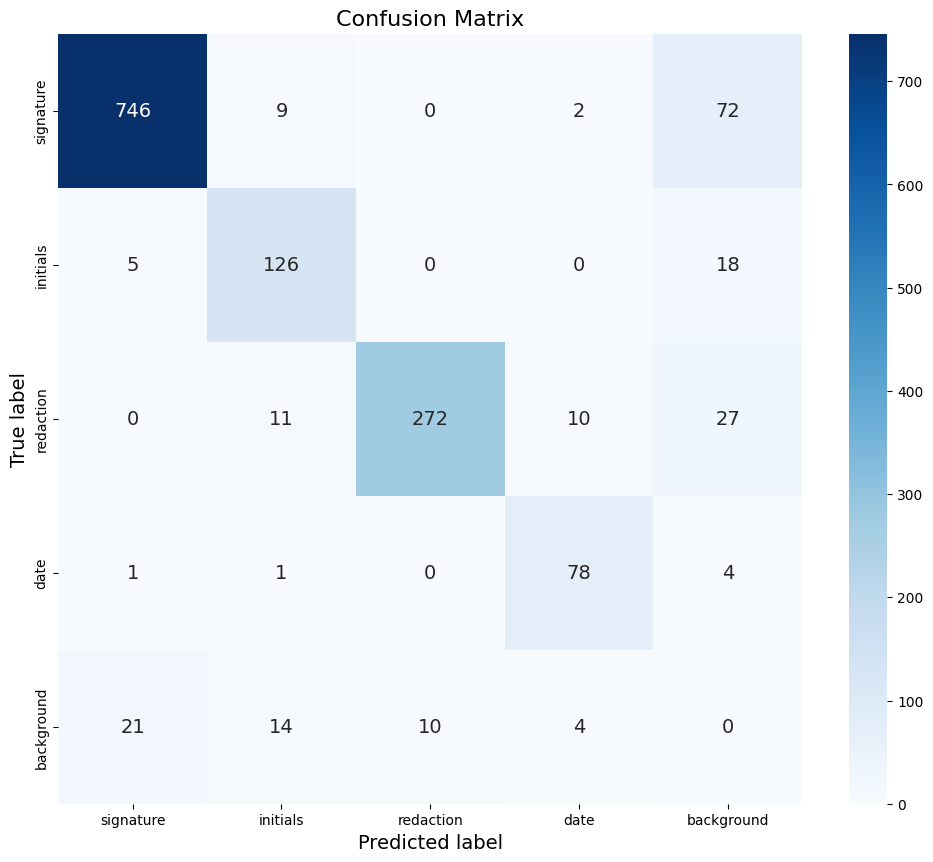

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

conf_matrix = np.array([
    [746, 9, 0, 2, 72],
    [5, 126, 0, 0, 18],
    [0, 11, 272, 10, 27],
    [1, 1, 0, 78, 4],
    [21, 14, 10, 4, 0]
])

labels = ['signature', 'initials', 'redaction', 'date', 'background']

plt.figure(figsize=(12, 10))

# Asegúrate de que el parámetro 'cbar' sea True si deseas que se muestre la barra de colores.
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 14}, cbar=True)

plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.savefig('conf_matrix_yolo.png', bbox_inches='tight', dpi=300)
plt.show()
